In [1]:
import time
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
# curves we will be using for experiments 
from ecdsa.curves import SECP160r1, NIST224p, SECP256k1, NIST384p, BRAINPOOLP512r1
import secrets

C:\Users\Haygen Tsoi\AppData\Local\Temp\ipykernel_9548\1020801726.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# https://sefiks.com/2016/04/11/key-exchange-from-carrying-handcuffed-briefcases-to-modern-cryptosystems/
def add_points(P, Q, q, a, b):
    x1, y1 = P
    x2, y2 = Q

    if x1 == x2 and y1 == y2:
        beta = (3 * x1 * x2 + a) * pow(2 * y1, -1, q)
    else:
        beta = (y2 - y1) * pow(x2 - x1, -1, q)
    
    x3 = (beta * beta - x1 - x2) % q
    y3 = (beta * (x1 - x3) - y1) % q

    is_on_curve((x3, y3), q, a, b)

    return x3, y3

def is_on_curve(P, q, a, b):
    x, y = P
    assert (y*y) % q == (pow(x,3, q) + a*x + b) % q

def apply_double_and_add_method(G, k, q, a, b):
    target_point = G
    k_binary = bin(k)[2:]

    for i in range(1, len(k_binary)):
        current_bit = k_binary[i: i+1]

        # doubling - always
        target_point = add_points(target_point, target_point, q, a, b)

        if current_bit == "1":
            target_point = add_points(target_point, G, q, a, b)

    is_on_curve(target_point, q, a, b)

    return target_point

In [3]:
#curve configuration: secp256k1
# y^2 = x^3 + a*x + b = y^2 = x^3 + 7
a = 0
b = 7
 
# base point
G = (55066263022277343669578718895168534326250603453777594175500187360389116729240, 
     32670510020758816978083085130507043184471273380659243275938904335757337482424)
 
# modulo
q = pow(2, 256) - pow(2, 32) - pow(2, 9) - pow(2, 8) - pow(2, 7) - pow(2, 6) - pow(2, 4) - pow(2, 0)
print(q)
 
# order
n = 115792089237316195423570985008687907852837564279074904382605163141518161494337

115792089237316195423570985008687907853269984665640564039457584007908834671663


In [4]:
is_on_curve(G, q, a, b)

In [5]:
point_2G = add_points(G, G, q, a, b)
point_2G

(89565891926547004231252920425935692360644145829622209833684329913297188986597,
 12158399299693830322967808612713398636155367887041628176798871954788371653930)

In [6]:
apply_double_and_add_method(G, 20, q, a, b)

(34773495056115281091786765947597603724784643419904767525769502836017890139287,
 8470533044743364938367028725608288731153024648869546164814808839694950063162)

In [7]:
s = random.getrandbits(256)
A = apply_double_and_add_method(G, s, q, a, b)
A

(43772992182850224475884602775731924151786657957823585038013769478761832412884,
 50703267231922445974984902439256894169921176001845864492670616863236899560211)

In [8]:
def encrypt(pt, A, q, a, b):
    r = random.getrandbits(128)
    x = apply_double_and_add_method(G, pt, q, a, b)
     
    c1 = apply_double_and_add_method(G, r, q, a, b) 
 
    c2 = apply_double_and_add_method(A, r, q, a, b)
    c2 = add_points(c2, x, q, a, b)
     
    return c1, c2

def decrypt(ct, s, q, a, b):
    c1, c2 = ct
    c1_prime = (c1[0], (-1*c1[1]) % q)
    s_prime = apply_double_and_add_method(c1_prime, s, q, a, b)
    s_prime = add_points(c2, s_prime, q, a, b)
    return s_prime

In [9]:
pt = 12345
ct = encrypt(pt, A, q, a, b)
ct

((30258266753272642504243646183133554375914481146900861833804129959286550544226,
  81693922819845289854121873523951731034192338643638954530037829009652357806859),
 (51189681004702853519231549357330090379225846078029258093680624122894804427149,
  89379806531236321902857198495617321890930694213792648634133686993924077704465))

In [10]:
s_prime = decrypt(ct, s, q, a, b)
s_prime

(108607064596551879580190606910245687803607295064141551927605737287325610911759,
 6661302038839728943522144359728938428925407345457796456954441906546235843221)

In [11]:
s_real = apply_double_and_add_method(G, pt, q, a, b)
s_real
# the decrypted data is the same as the point in the curve

(108607064596551879580190606910245687803607295064141551927605737287325610911759,
 6661302038839728943522144359728938428925407345457796456954441906546235843221)

### SAKE machanism
Declare configurations

In [12]:
#curve configuration: secp256k1
# y^2 = x^3 + a*x + b = y^2 = x^3 + 7
a = 0
b = 7
 
# base point
G = (55066263022277343669578718895168534326250603453777594175500187360389116729240, 
     32670510020758816978083085130507043184471273380659243275938904335757337482424)
 
# modulo
q = pow(2, 256) - pow(2, 32) - pow(2, 9) - pow(2, 8) - pow(2, 7) - pow(2, 6) - pow(2, 4) - pow(2, 0)
print(q)
 
# order
n = 115792089237316195423570985008687907852837564279074904382605163141518161494337

115792089237316195423570985008687907853269984665640564039457584007908834671663


Edge starts the encryption process

In [13]:
# Edge secret key
Se = random.getrandbits(256)
# Edge shared key
Ae = apply_double_and_add_method(G=G, k=Se, q=q, a=a, b=b)
# Ae is then sent to the IoT device
Ae

(8857972648207128053326221275514024558665904529490805074548938972855350327086,
 30195615213063391639232768547516825480982732150737911944217043723818662799009)

IoT device process the shared key

In [14]:
# IoT secret key
Si = random.getrandbits(256)
# IoT shared key
Ai = apply_double_and_add_method(G=G, k=Si, q=q, a=a, b=b)
# IoT computes the session key
SHi = apply_double_and_add_method(G=Ae, k=Si, q=q, a=a, b=b)
# IoT then sends the shared key and session key to the Edge
Ai

(91645783991975419211569526390957520932577486273929909704968297866688148203239,
 66387544363359596007106502293635958674140980719002088004791057076673356081829)

Edge then validate the keys

In [15]:
# Edge computes the session key
SHe = apply_double_and_add_method(G=Ai, k=Se, q=q, a=a, b=b)
# Edge checks if the session keys match
if SHe == SHi:
    print("Validation completed successfully")
else:
    print("Validation failed")

Validation completed successfully


## Experiment on key size

In [16]:
def experiment(curve, size):
    generator = curve.generator
    n = generator.order()

    a = curve.curve.a()
    b = curve.curve.b()
    q = curve.curve.p()

    print(f"Equation of the curve: y^2 = x^3 + {a}*x + {b}")
    print(f"Base point of the curve: {(generator.x(), generator.y())}")
    print(f"Order of the curve: {n}")
    print(f"Modulus of the curve: {q}")

    G = (generator.x(), generator.y())
    is_on_curve(G, q, a, b)

    start = time.time()
    for i in range(100):
        Se = secrets.randbits(size)
        Ae = apply_double_and_add_method(G=G, k=Se, q=q, a=a, b=b)
    time_taken = (time.time() - start) / 100

    return time_taken, q.bit_length()

key_gen_time = []
schemes = []
security = []
key_sizes = []

### SECP160r1 (80 bits for Symmetric Key Size)

In [17]:
time_taken, key_size = experiment(SECP160r1, 160)
print(time_taken)
key_gen_time.append(time_taken)
schemes.append("SECP160r1")
security.append(80)
key_sizes.append(key_size)

Equation of the curve: y^2 = x^3 + -3*x + 163235791306168110546604919403271579530548345413
Base point of the curve: (425826231723888350446541592701409065913635568770, 203520114162904107873991457957346892027982641970)
Order of the curve: 1461501637330902918203687197606826779884643492439
Modulus of the curve: 1461501637330902918203684832716283019653785059327


0.00938199758529663


### NIST224p (112 bits for Symmetic Key Size)

In [18]:
time_taken, key_size = experiment(NIST224p, 224)
print(time_taken)
key_gen_time.append(time_taken)
schemes.append("NIST224p")
security.append(112)
key_sizes.append(key_size)

Equation of the curve: y^2 = x^3 + -3*x + 18958286285566608000408668544493926415504680968679321075787234672564
Base point of the curve: (19277929113566293071110308034699488026831934219452440156649784352033, 19926808758034470970197974370888749184205991990603949537637343198772)
Order of the curve: 26959946667150639794667015087019625940457807714424391721682722368061
Modulus of the curve: 26959946667150639794667015087019630673557916260026308143510066298881


0.02260238170623779


### SECP256k1 (128 bits for Symmetric Key Size)

In [19]:
time_taken, key_size = experiment(SECP256k1, 256)
print(time_taken)
key_gen_time.append(time_taken)
schemes.append("SECP256k1")
security.append(128)
key_sizes.append(key_size)


Equation of the curve: y^2 = x^3 + 0*x + 7
Base point of the curve: (55066263022277343669578718895168534326250603453777594175500187360389116729240, 32670510020758816978083085130507043184471273380659243275938904335757337482424)
Order of the curve: 115792089237316195423570985008687907852837564279074904382605163141518161494337
Modulus of the curve: 115792089237316195423570985008687907853269984665640564039457584007908834671663
0.02272352695465088


### NIST384p (192 bits for Symmetric Key Size)

In [20]:
time_taken, key_size = experiment(NIST384p, 384)
print(time_taken)
key_gen_time.append(time_taken)
schemes.append("NIST384p")
security.append(192)
key_sizes.append(key_size)

Equation of the curve: y^2 = x^3 + -3*x + 27580193559959705877849011840389048093056905856361568521428707301988689241309860865136260764883745107765439761230575
Base point of the curve: (26247035095799689268623156744566981891852923491109213387815615900925518854738050089022388053975719786650872476732087, 8325710961489029985546751289520108179287853048861315594709205902480503199884419224438643760392947333078086511627871)
Order of the curve: 39402006196394479212279040100143613805079739270465446667946905279627659399113263569398956308152294913554433653942643
Modulus of the curve: 39402006196394479212279040100143613805079739270465446667948293404245721771496870329047266088258938001861606973112319
0.05361811876296997


### BRAINPOOLP512r1 (256 bits for Symmetric Key Size)

In [21]:
time_taken, key_size = experiment(BRAINPOOLP512r1, 512)
print(time_taken)
key_gen_time.append(time_taken)
schemes.append("BRAINPOOLP512r1")
security.append(256)
key_sizes.append(key_size)

Equation of the curve: y^2 = x^3 + 6294860557973063227666421306476379324074715770622746227136910445450301914281276098027990968407983962691151853678563877834221834027439718238065725844264138*x + 3245789008328967059274849584342077916531909009637501918328323668736179176583263496463525128488282611559800773506973771797764811498834995234341530862286627
Base point of the curve: (6792059140424575174435640431269195087843153390102521881468023012732047482579853077545647446272866794936371522410774532686582484617946013928874296844351522, 6592244555240112873324748381429610341312712940326266331327445066687010545415256461097707483288650216992613090185042957716318301180159234788504307628509330)
Order of the curve: 8948962207650232551656602815159153422162609644098354511344597187200057010413418528378981730643524959857451398370029280583094215613882043973354392115544169
Modulus of the curve: 89489622076502325516566028151591534221626096440983545113445971872000570104135524399179343041919569427654465303864273

In [26]:
print(key_sizes)

[160, 224, 256, 384, 512]


## Plotting

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Haygen Tsoi\AppData\Local\Temp\ipykernel_9548\868951278.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[0].annotate(txt, (df['Security(in bits)'][i], df['Time(in ms)'][i]))
C:\Users\Haygen Tsoi\AppData\Local\Temp\ipykernel_9548\868951278.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[1].annotate(txt, (df['Security(in bits)'][i], df['Key Size (in bits)'][i]))


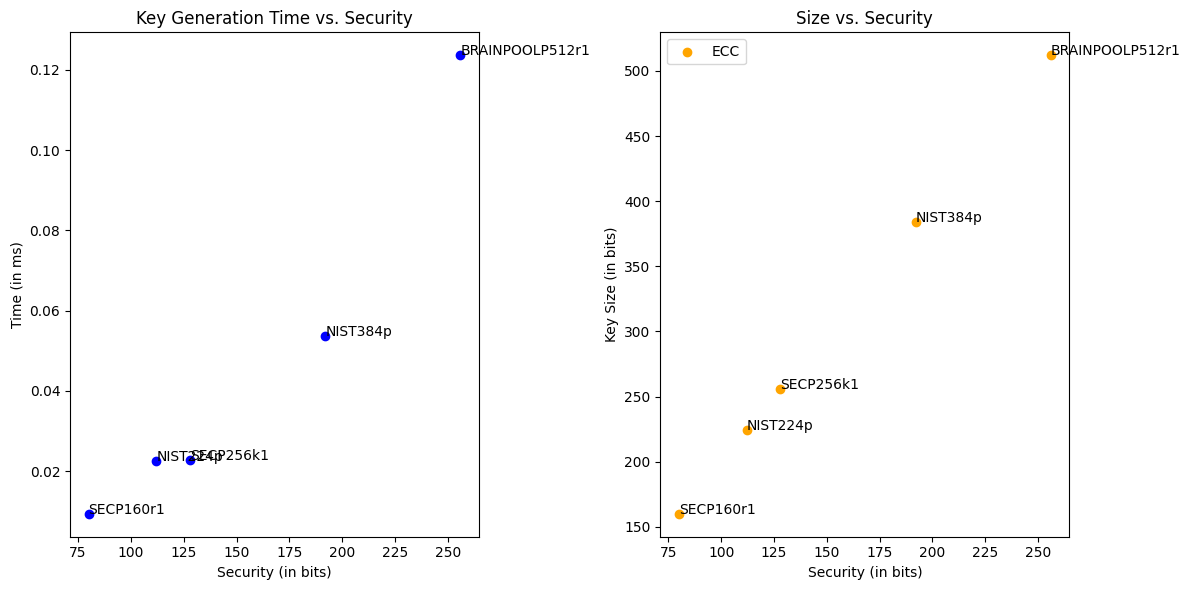

In [22]:
df = pd.DataFrame({
    'Time(in ms)': key_gen_time,
    'Security(in bits)': security,
    'Key Size (in bits)': key_sizes
}, index=schemes)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot 'Time(in ms)' vs. 'Security(in bits)'
axes[0].scatter(df['Security(in bits)'], df['Time(in ms)'], color='blue', label='ECC')
axes[0].set_title('Key Generation Time vs. Security')
axes[0].set_xlabel('Security (in bits)')
axes[0].set_ylabel('Time (in ms)')
axes[1].legend()

for i, txt in enumerate(schemes):
    axes[0].annotate(txt, (df['Security(in bits)'][i], df['Time(in ms)'][i]))

# z = np.polyfit(df['Security(in bits)'], df['Time(in ms)'], 1)
# p = np.poly1d(z)
# axes[0].plot(df['Security(in bits)'], p(df['Security(in bits)']), "b--")



# Plot 'Size(in bytes)' vs. 'Key Size(in bits)' for df
axes[1].scatter(df['Security(in bits)'], df['Key Size (in bits)'], color='orange', label='ECC')
# Annotate points from df
for i, txt in enumerate(df.index):
    axes[1].annotate(txt, (df['Security(in bits)'][i], df['Key Size (in bits)'][i]))

# z = np.polyfit(df['Security(in bits)'], df['Key Size (in bits)'], 1)
# p = np.poly1d(z)
# axes[1].plot(df['Security(in bits)'], p(df['Security(in bits)']), "y--")


axes[1].set_title('Size vs. Security')
axes[1].set_xlabel('Security (in bits)')
axes[1].set_ylabel('Key Size (in bits)')
axes[1].legend()



plt.tight_layout()
plt.show()


C:\Users\Haygen Tsoi\AppData\Local\Temp\ipykernel_9548\702010492.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt, (df['Security(in bits)'][i], df[y_data_label][i]), fontsize=9,
C:\Users\Haygen Tsoi\AppData\Local\Temp\ipykernel_9548\702010492.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt, (filtered_df['Security(in bits)'][i], filtered_df[y_data_label][i]), fontsize=9,


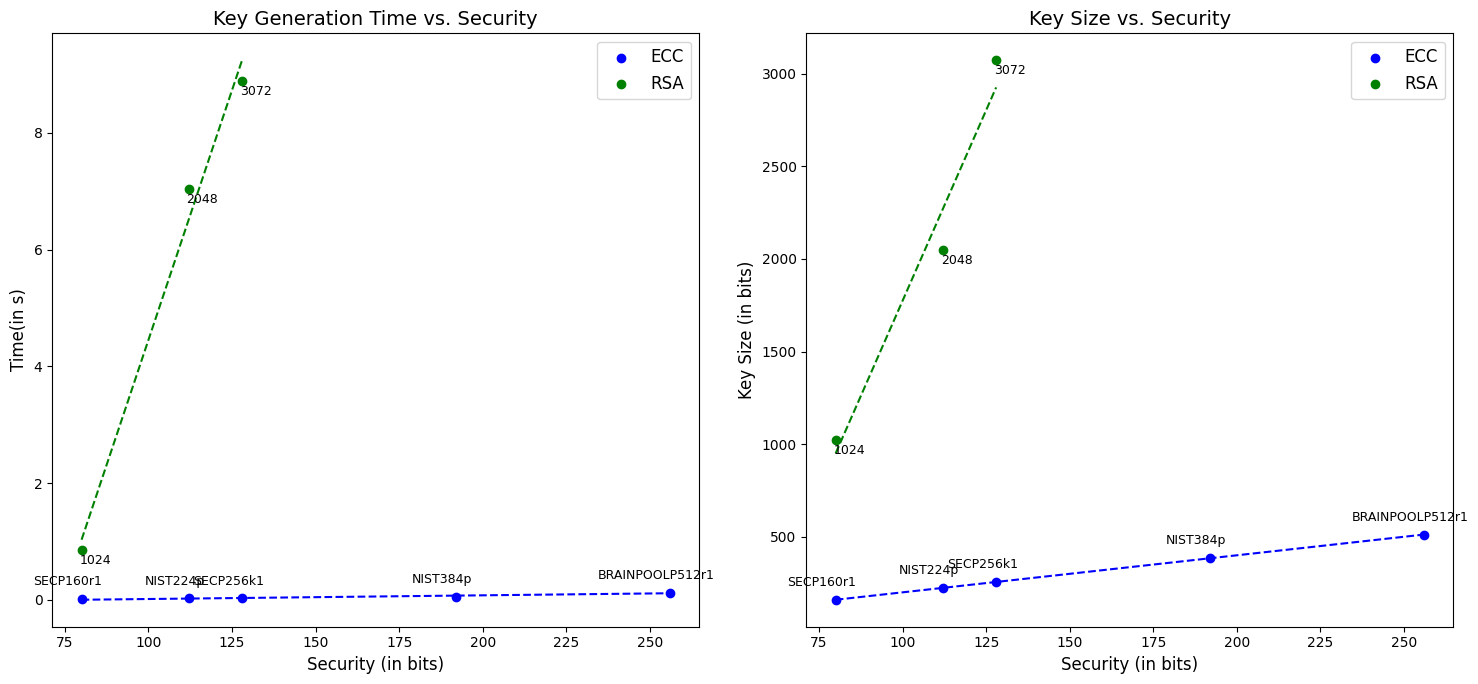

In [23]:
df = pd.DataFrame({
    'Time(in s)': key_gen_time,
    'Security(in bits)': security,
    'Key Size (in bits)': key_sizes
}, index=schemes)

rsa_key_gen_time = [0.8536460399627686, 7.0309107303619385, 8.89483904838562, 10000, 10000]
rsa_security = [80, 112, 128, 192, 256]
rsa_size = [1024, 2048, 3072, 7680, 15360]
rsa_schemes = ['1024', '2048', '3072', '7680', '15360']

df2 = pd.DataFrame({
    'Time(in s)': rsa_key_gen_time,
    'Security(in bits)': rsa_security,
    'Key Size (in bits)': rsa_size,
}, index=rsa_schemes)

# Threshold to filter the RSA data
threshold = 1000
filtered_df = df2[df2['Time(in s)'] < threshold]

# Create the subplot figure with two axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Adjust the font size globally for clearer text
plt.rcParams.update({'font.size': 12})

# Improved plotting with clearer annotations
for ax, y_label, title, y_data_label, label in zip(axes, 
                                                    ['Time(in s)', 'Key Size (in bits)'], 
                                                    ['Key Generation Time vs. Security', 'Key Size vs. Security'], 
                                                    ['Time(in s)', 'Key Size (in bits)'], 
                                                    ['ECC', 'RSA']):
    ax.scatter(df['Security(in bits)'], df[y_data_label], color='blue', label='ECC')
    ax.scatter(filtered_df['Security(in bits)'], filtered_df[y_data_label], color='green', label='RSA')
    
    # Annotate ECC points with adjusted positioning to avoid overlap
    for i, txt in enumerate(df.index):
        ax.annotate(txt, (df['Security(in bits)'][i], df[y_data_label][i]), fontsize=9, 
                    textcoords="offset points", xytext=(-10,10), ha='center')
    
    # Annotate RSA points with adjusted positioning to avoid overlap
    for i, txt in enumerate(filtered_df.index):
        ax.annotate(txt, (filtered_df['Security(in bits)'][i], filtered_df[y_data_label][i]), fontsize=9, 
                    textcoords="offset points", xytext=(10,-10), ha='center')
    
    # Trend lines for ECC
    z = np.polyfit(df['Security(in bits)'], df[y_data_label], 1)
    p = np.poly1d(z)
    ax.plot(df['Security(in bits)'], p(df['Security(in bits)']), "b--")
    
    # Trend lines for RSA
    z2 = np.polyfit(filtered_df['Security(in bits)'], filtered_df[y_data_label], 1)
    p2 = np.poly1d(z2)
    ax.plot(filtered_df['Security(in bits)'], p2(filtered_df['Security(in bits)']), "g--")
    
    # Set titles and labels with adjusted font sizes for clarity
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Security (in bits)', fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()

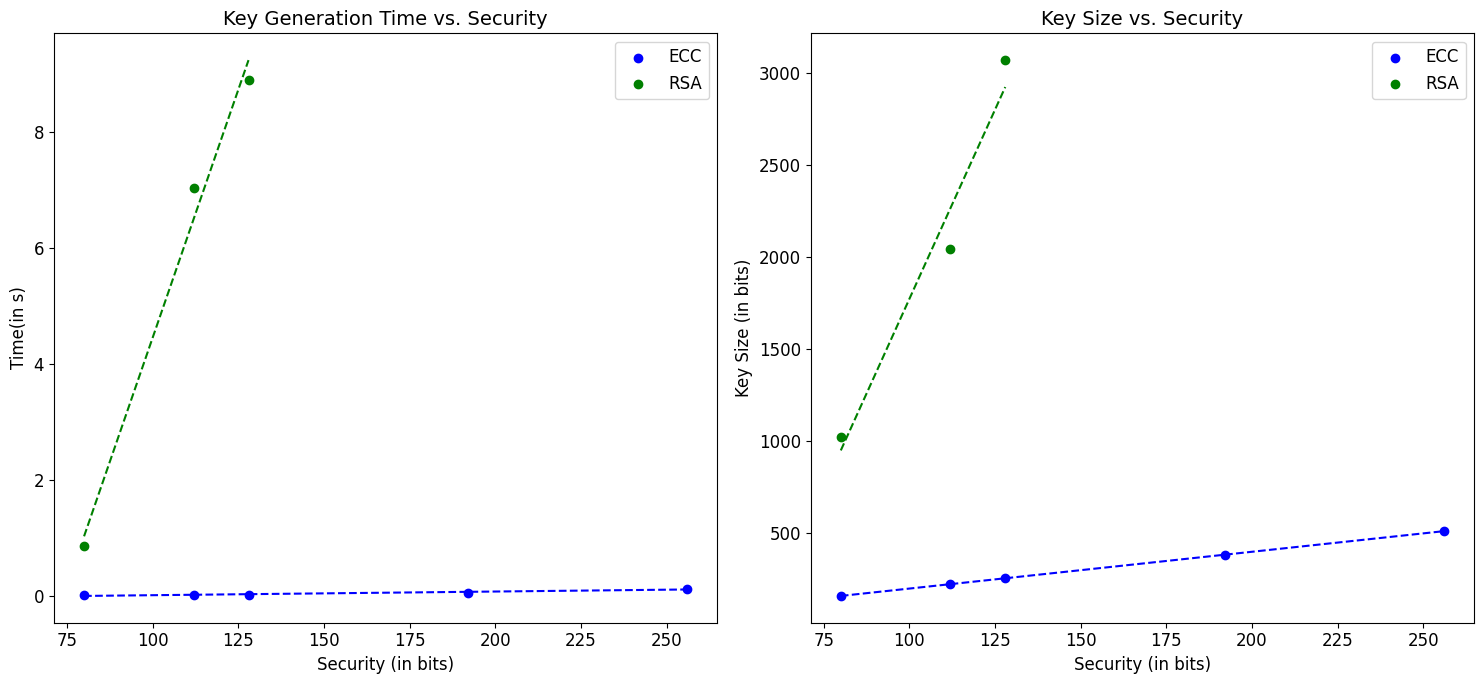

In [25]:
# Create the subplot figure with two axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Adjust the font size globally for clearer text
plt.rcParams.update({'font.size': 12})

# Improved plotting with clearer annotations
for ax, y_label, title, y_data_label, label in zip(axes, 
                                                    ['Time(in s)', 'Key Size (in bits)'], 
                                                    ['Key Generation Time vs. Security', 'Key Size vs. Security'], 
                                                    ['Time(in s)', 'Key Size (in bits)'], 
                                                    ['ECC', 'RSA']):
    ax.scatter(df['Security(in bits)'], df[y_data_label], color='blue', label='ECC')
    ax.scatter(filtered_df['Security(in bits)'], filtered_df[y_data_label], color='green', label='RSA')
    
    # Trend lines for ECC
    z = np.polyfit(df['Security(in bits)'], df[y_data_label], 1)
    p = np.poly1d(z)
    ax.plot(df['Security(in bits)'], p(df['Security(in bits)']), "b--")
    
    # Trend lines for RSA
    z2 = np.polyfit(filtered_df['Security(in bits)'], filtered_df[y_data_label], 1)
    p2 = np.poly1d(z2)
    ax.plot(filtered_df['Security(in bits)'], p2(filtered_df['Security(in bits)']), "g--")
    
    # Set titles and labels with adjusted font sizes for clarity
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Security (in bits)', fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the figure
plt.show()